In [1]:
import pandas as pd

# Загрузка данных из JSON-файла
file_path = 'events.json'  # Укажите путь к файлу
with open(file_path, 'r', encoding='utf-8') as file:
    data = pd.read_json(file)

# Данные находятся внутри поля "events", поэтому их нужно преобразовать в датафрейм
df = pd.json_normalize(data['events'])

# Просмотр первых нескольких строк датафрейма
print(df.head())

             timestamp                                          signature
0  2023-08-21T08:00:00  MALWARE-CNC Win.Trojan.Jadtre variant outbound...
1  2023-08-21T09:00:00  EXPLOIT Remote Windows Win32k elevation of pri...
2  2023-08-21T10:00:00            EXPLOIT Java JRE to Oracle WebLogic RCE
3  2023-08-21T11:00:00          NETBIOS DCERPC NCACN-IP-TCP interfaces BO
4  2023-08-21T12:00:00  MALWARE-CNC User-Agent known malicious connect...


In [2]:
# Просмотр уникальных значений в поле "signature"
unique_signatures = df['signature'].unique()
print("Уникальные типы событий:", unique_signatures)

# Подсчет количества событий каждого типа
signature_counts = df['signature'].value_counts()
print("Количество событий по типам:\n", signature_counts)

Уникальные типы событий: ['MALWARE-CNC Win.Trojan.Jadtre variant outbound connection'
 'EXPLOIT Remote Windows Win32k elevation of privilege attempt'
 'EXPLOIT Java JRE to Oracle WebLogic RCE'
 'NETBIOS DCERPC NCACN-IP-TCP interfaces BO'
 'MALWARE-CNC User-Agent known malicious connecting IP'
 'INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306'
 'EXPLOIT Multiple IIS 6.0 attempt' 'EXPLOIT Oracle 9i TNS Listener BO'
 'NETBIOS SMB-DS srvsvc NetrPathCanonicalize BO']
Количество событий по типам:
 signature
MALWARE-CNC Win.Trojan.Jadtre variant outbound connection       12
EXPLOIT Remote Windows Win32k elevation of privilege attempt    11
EXPLOIT Java JRE to Oracle WebLogic RCE                         11
NETBIOS DCERPC NCACN-IP-TCP interfaces BO                       11
MALWARE-CNC User-Agent known malicious connecting IP            11
INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306      11
EXPLOIT Multiple IIS 6.0 attempt                                11
EXPLOIT Oracl

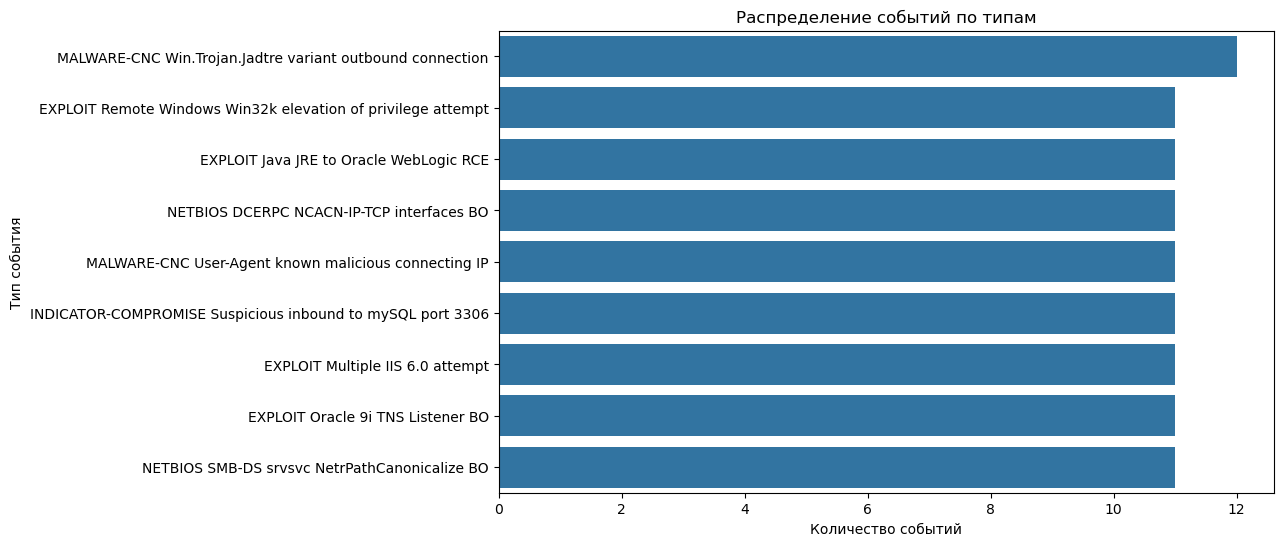

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))
sns.countplot(y='signature', data=df, order=df['signature'].value_counts().index)
plt.title('Распределение событий по типам')
plt.xlabel('Количество событий')
plt.ylabel('Тип события')
plt.show()